In [ ]:
from google.colab import drive
import os
import sys

# 구글 드라이브 마운트
drive.mount('/content/drive')

# 드라이브 접근
%cd /content/drive/MyDrive/

# 미션 수행을 위한 폴더 생성
!mkdir -p Mission11

Mounted at /content/drive
/content/drive/MyDrive


# 미션 1
## 미션 1-1 : 패션 스타일 이미지 분류
<strong>
1. “{W/T}_{이미지ID}_{시대별}_{스타일별}_{성별}.jpg”형식으로 저장된 데이터셋을 분류하여 정리한다. <br>
2. 분류는 성별별, 스타일별 데이터의 개수로 한다. <br>
3. 중복된 데이터를 카운팅한다.
</strong>

In [ ]:
import os
import pandas as pd
from IPython.display import display, display_html

# 파일 리스트
training_image_list = os.listdir('dataset/training_image')
validation_image_list = os.listdir('dataset/validation_image')

# 파일리스트 -> 메타데이터 Pandas 객체
def path2data(image_list):
    data = []
    for i in range(len(image_list)):
        meta_data = image_list[i].split('_')

        wt = meta_data[0]
        image_id = meta_data[1]
        time = meta_data[2]
        style = meta_data[3]
        gender = meta_data[4][0]

        row = {
            'wt': wt,
            'image_id': image_id,
            'time': time,
            'style': style,
            'gender': gender
        }
        data.append(row)
    return pd.DataFrame(data)

# 변환 적용
training_df = path2data(training_image_list)
validation_df = path2data(validation_image_list)

# 결과 보기 좋게 HTML편집
def display_left(*args):
    html_str = ''
    for df in args:
        html_str += f'<div style="margin-right:30px;">{df.to_html()}</div>'
    display_html(f'<div style="display: flex;">{html_str}</div>', raw=True)

# 결과 확인
display_left(training_df.head(), validation_df.head())

# 결과 저장
training_df.to_csv('Mission11/training_df.csv', index=False)
validation_df.to_csv('Mission11/validation_df.csv', index=False)

,wt,image_id,time,style,gender
0,W,13846,60,minimal,W
1,W,15811,10,sportivecasual,M
2,W,14489,19,normcore,W
3,W,12533,80,bold,M
4,W,16836,19,normcore,M
,wt,image_id,time,style,gender
0,W,11610,90,grunge,W
1,W,38588,19,genderless,W
2,W,47169,70,hippie,W
3,W,02498,50,feminine,W


In [ ]:
# 메타 정보 가공
training_count_data = training_df[['gender', 'style', 'image_id']].groupby(['gender', 'style']).count()
validation_count_data = validation_df[['gender', 'style', 'image_id']].groupby(['gender', 'style']).count()

# 출력 데이터 컬럼이름 수정
training_count_data.rename(columns={'image_id': 'training count'}, inplace=True)
validation_count_data.rename(columns={'image_id': 'validation count'}, inplace=True)

# 결과 확인
display_left(training_count_data, validation_count_data)

# 데이터 저장
training_count_data.to_csv('Mission11/training_count_data.csv')
validation_count_data.to_csv('Mission11/validation_count_data.csv')

training count 
 
 
 gender 
 style 
 
 
 
 
 
 M 
 bold 
 268 
 
 
 hiphop 
 274 
 
 
 hippie 
 260 
 
 
 ivy 
 237 
 
 
 metrosexual 
 278 
 
 
 mods 
 269 
 
 
 normcore 
 364 
 
 
 sportivecasual 
 298 
 
 
 W 
 athleisure 
 67 
 
 
 bodyconscious 
 95 
 
 
 cityglam 
 67 
 
 
 classic 
 77 
 
 
 disco 
 37 
 
 
 ecology 
 64 
 
 
 feminine 
 154 
 
 
 genderless 
 77 
 
 
 grunge 
 31 
 
 
 hiphop 
 48 
 
 
 hippie 
 91 
 
 
 kitsch 
 91 
 
 
 lingerie 
 55 
 
 
 lounge 
 45 
 
 
 military 
 33 
 
 
 minimal 
 139 
 
 
 normcore 
 153 
 
 
 oriental 
 78 
 
 
 popart 
 41 
 
 
 powersuit 
 120 
 
 
 punk 
 65 
 
 
 space 
 37 
 
 
 sportivecasual 
 157 
 
 
 
 
 
 
 
 validation count 
 
 
 gender 
 style 
 
 
 
 
 
 M 
 bold 
 57 
 
 
 hiphop 
 66 
 
 
 hippie 
 82 
 
 
 ivy 
 79 
 
 
 metrosexual 
 58 
 
 
 mods 
 80 
 
 
 normcore 
 51 
 
 
 sportivecasual 
 52 
 
 
 W 
 athleisure 
 14 
 
 
 bodyconscious 
 23 
 
 
 cityglam 
 18 
 
 
 classic 
 22 
 
 
 disco 
 10 
 
 
 ecology 
 17 
 
 
 feminine 
 44 
 
 
 genderless 
 12 
 
 
 grunge 
 10 
 
 
 hiphop 
 8 
 
 
 hippie 
 14 
 
 
 kitsch 
 22 
 
 
 lingerie 
 5 
 
 
 lounge 
 8 
 
 
 military 
 9 
 
 
 minimal 
 35 
 
 
 normcore 
 20 
 
 
 oriental 
 18 
 
 
 popart 
 8 
 
 
 powersuit 
 34 
 
 
 punk 
 12 
 
 
 space 
 15 
 
 
 sportivecasual 
 48

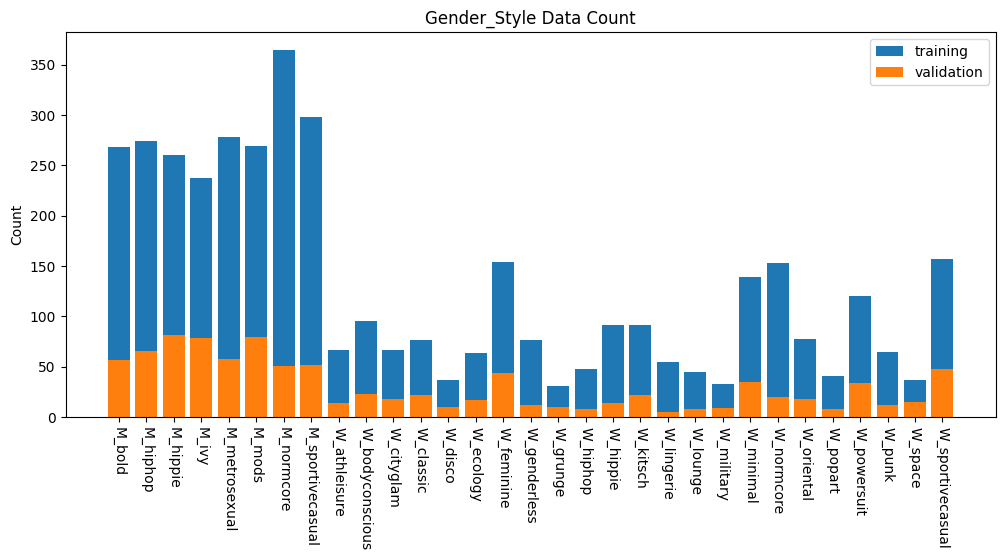

In [ ]:
import matplotlib.pyplot as plt

# Group화 된 데이터를 다시 데이터프레임으로 변환
training_count_data_re = training_count_data.reset_index()
validation_count_data_re = validation_count_data.reset_index()

# 겹치는 스타일이 있음으로 Gender와 Style결합
training_count_data_re['name'] = training_count_data_re['gender'] + '_' + training_count_data_re['style']
validation_count_data_re['name'] = validation_count_data_re['gender'] + '_' + validation_count_data_re['style']

# 시각화
plt.figure(figsize=(12, 5))
plt.title('Gender_Style Data Count')
plt.ylabel('Count')
plt.xticks(rotation=270)
plt.bar(training_count_data_re['name'], training_count_data_re['training count'], label="training")
plt.bar(validation_count_data_re['name'], validation_count_data_re['validation count'], label="validation")

plt.legend()
plt.show()
plt.savefig('Mission11/gender_style_data_count.png')

In [ ]:
import matplotlib.pyplot as plt

# 중복된 image_id 찾기
training_duplicates = training_df[training_df.duplicated(['image_id'], keep=False)]
validation_duplicates = validation_df[validation_df.duplicated(['image_id'], keep=False)]

# 중복된 데이터 출력
training_duplicates.sort_values(by=['image_id'])
validation_duplicates.sort_values(by=['image_id'])

# 결과 확인
display_left(training_duplicates, validation_duplicates)

,wt,image_id,time,style,gender
1189,W,17802,80,bold,M
2336,T,02958,19,normcore,M
2501,T,09717,19,genderless,W
2502,W,10028,50,classic,W
2534,T,10028,10,sportivecasual,W
2867,W,09717,19,normcore,W
3638,T,17802,19,normcore,M
3761,W,02958,60,mods,M
,wt,image_id,time,style,gender


## 미션 1-1 부가 분석
<strong>
1. 연도별 데이터 분석
</strong>

### 1. 연도별 데이터 분석

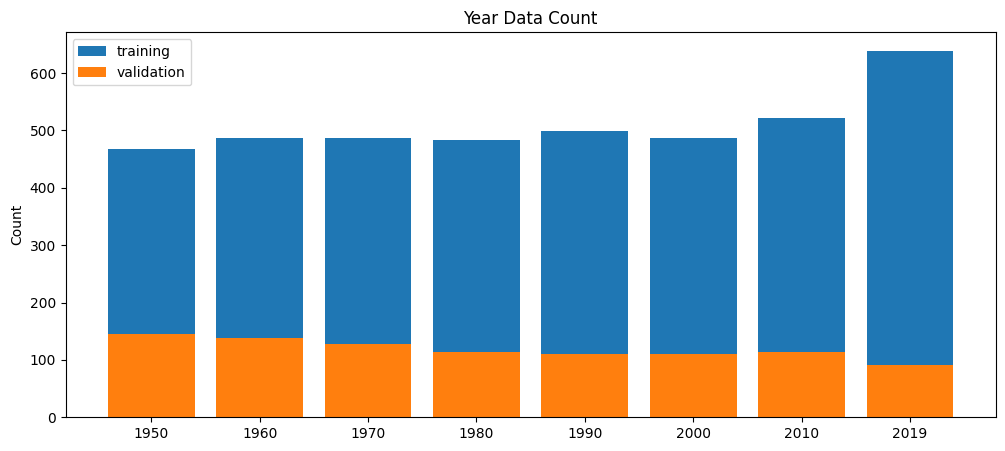

In [ ]:
import matplotlib.pyplot as plt

# 시각화를 위한 데이터 복사
training_df_tt = training_df.copy()
validation_df_tt = validation_df.copy()

# 시간 그룹화를 위한 00 -> 2000, 80 -> 1980 변환
def time2year(time):
    g20 = ['00', '10', '19']
    if time in g20:
        return '20' + time
    else:
        return '19' + time

training_df_tt['time'] = training_df_tt['time'].apply(time2year)
validation_df_tt['time'] = validation_df_tt['time'].apply(time2year)

# 시간 데이터로 그룹화
training_by_year = training_df_tt.groupby('time').count()
validation_by_year = validation_df_tt.groupby('time').count()

# 시각화
plt.figure(figsize=(12, 5))
plt.title('Year Data Count')
plt.ylabel('Count')
plt.bar(training_by_year.index, training_by_year['image_id'], label="training")
plt.bar(validation_by_year.index, validation_by_year['image_id'], label="validation")

plt.legend()
plt.show()
plt.savefig('Mission11/year_data_count.png')